In [20]:
import pandas as pd

# Replace 'path_to_file' with the actual path to your CSV file
df = pd.read_csv('cleaned_data.csv', delimiter=',')

In [21]:
df

,Circle,Division,SubDivision,Section,Area,CatCode,CatDesc,TotServices,BilledServices,Units,Load,date
0,WARANGAL,WARANGAL,MULUGU ROAD,MATWADA,MATWADA,3.0,INDUSTRIAL,99.0,61.0,29225.0,1794.585,Jan-19
1,KAMAREDDY,YELLAREDDY,YELLAREDDY,YELLAREDDY,THIMMAPOOR,3.0,INDUSTRIAL,2.0,2.0,1156.0,9.000,Jan-19
2,KAMAREDDY,YELLAREDDY,YELLAREDDY,YELLAREDDY,HAJIPOOR,3.0,INDUSTRIAL,3.0,2.0,84.0,20.000,Jan-19
3,ADILABAD,UTNOOR,UTNOOR,GUDIHATNOOR,GUDIHATHNOOR,3.0,INDUSTRIAL,18.0,13.0,15698.0,331.000,Jan-19
4,KAMAREDDY,YELLAREDDY,YELLAREDDY,NAGIREDDIPET,MASANPALLI (M),3.0,INDUSTRIAL,1.0,1.0,275.0,10.000,Jan-19
...,...,...,...,...,...,...,...,...,...,...,...,...
261792,WARANGAL,NARSAMPET,NARSAMPET(TOWN,DUGGONDI,REBALLY,3.0,INDUSTRIAL,1.0,1.0,109.0,5.000,Jan-24
261793,WARANGAL,NARSAMPET,NARSAMPET(TOWN,DUGGONDI,THOGARAIMLLAIAHPALLY,3.0,INDUSTRIAL,1.0,1.0,0.0,5.000,Jan-24
261794,WARANGAL,NARSAMPET,NARSAMPET(TOWN,DUGGONDI,VENKATAPOOR,3.0,INDUSTRIAL,7.0,5.0,2693.0,95.000,Jan-24
261795,WARANGAL,RURAL WARANGAL,KAPULAKANAPARTHY,MACHAPOOR,SHIVATHANDA,3.0,INDUSTRIAL,1.0,1.0,1694.0,49.510,Jan-24


In [22]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Define the columns to be scaled
columns_to_scale = ['Load', 'TotServices', 'BilledServices', 'Units']

# Apply Min-Max scaling to the specified columns
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

In [23]:
df[columns_to_scale]

,Load,TotServices,BilledServices,Units
0,0.145364,0.279202,0.242063,0.412006
1,0.000729,0.002849,0.007937,0.397081
2,0.001620,0.005698,0.007937,0.396511
3,0.026811,0.048433,0.051587,0.404814
4,0.000810,0.000000,0.003968,0.396613
...,...,...,...,...
261792,0.000405,0.000000,0.003968,0.396524
261793,0.000405,0.000000,0.003968,0.396466
261794,0.007695,0.017094,0.019841,0.397898
261795,0.004010,0.000000,0.003968,0.397367


In [24]:
# Perform one-hot encoding on categorical features
catcode_dummies = pd.get_dummies(df['CatCode'], prefix='CatCode')
catdesc_dummies = pd.get_dummies(df['CatDesc'], prefix='CatDesc')

# Concatenate the one-hot encoded columns with the original DataFrame
df_encoded = pd.concat([df, catcode_dummies, catdesc_dummies], axis=1)

# Drop the original categorical columns
df_encoded.drop(['CatCode', 'CatDesc'], axis=1, inplace=True)

In [25]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode Area, Circle, and Division features
df['Area'] = label_encoder.fit_transform(df['Area'])
df['Circle'] = label_encoder.fit_transform(df['Circle'])
df['Division'] = label_encoder.fit_transform(df['Division'])


In [26]:
df

,Circle,Division,SubDivision,Section,Area,CatCode,CatDesc,TotServices,BilledServices,Units,Load,date
0,15,36,MULUGU ROAD,MATWADA,2367,3.0,INDUSTRIAL,0.279202,0.242063,0.412006,0.145364,Jan-19
1,7,38,YELLAREDDY,YELLAREDDY,3833,3.0,INDUSTRIAL,0.002849,0.007937,0.397081,0.000729,Jan-19
2,7,38,YELLAREDDY,YELLAREDDY,1300,3.0,INDUSTRIAL,0.005698,0.007937,0.396511,0.001620,Jan-19
3,0,35,UTNOOR,GUDIHATNOOR,1218,3.0,INDUSTRIAL,0.048433,0.051587,0.404814,0.026811,Jan-19
4,7,38,YELLAREDDY,NAGIREDDIPET,2354,3.0,INDUSTRIAL,0.000000,0.003968,0.396613,0.000810,Jan-19
...,...,...,...,...,...,...,...,...,...,...,...,...
261792,15,27,NARSAMPET(TOWN,DUGGONDI,3339,3.0,INDUSTRIAL,0.000000,0.003968,0.396524,0.000405,Jan-24
261793,15,27,NARSAMPET(TOWN,DUGGONDI,3860,3.0,INDUSTRIAL,0.000000,0.003968,0.396466,0.000405,Jan-24
261794,15,27,NARSAMPET(TOWN,DUGGONDI,4068,3.0,INDUSTRIAL,0.017094,0.019841,0.397898,0.007695,Jan-24
261795,15,31,KAPULAKANAPARTHY,MACHAPOOR,3562,3.0,INDUSTRIAL,0.000000,0.003968,0.397367,0.004010,Jan-24


In [27]:
df['date'] = pd.to_datetime(df['date'], format='%b-%y')


In [28]:
df

,Circle,Division,SubDivision,Section,Area,CatCode,CatDesc,TotServices,BilledServices,Units,Load,date
0,15,36,MULUGU ROAD,MATWADA,2367,3.0,INDUSTRIAL,0.279202,0.242063,0.412006,0.145364,2019-01-01
1,7,38,YELLAREDDY,YELLAREDDY,3833,3.0,INDUSTRIAL,0.002849,0.007937,0.397081,0.000729,2019-01-01
2,7,38,YELLAREDDY,YELLAREDDY,1300,3.0,INDUSTRIAL,0.005698,0.007937,0.396511,0.001620,2019-01-01
3,0,35,UTNOOR,GUDIHATNOOR,1218,3.0,INDUSTRIAL,0.048433,0.051587,0.404814,0.026811,2019-01-01
4,7,38,YELLAREDDY,NAGIREDDIPET,2354,3.0,INDUSTRIAL,0.000000,0.003968,0.396613,0.000810,2019-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...
261792,15,27,NARSAMPET(TOWN,DUGGONDI,3339,3.0,INDUSTRIAL,0.000000,0.003968,0.396524,0.000405,2024-01-01
261793,15,27,NARSAMPET(TOWN,DUGGONDI,3860,3.0,INDUSTRIAL,0.000000,0.003968,0.396466,0.000405,2024-01-01
261794,15,27,NARSAMPET(TOWN,DUGGONDI,4068,3.0,INDUSTRIAL,0.017094,0.019841,0.397898,0.007695,2024-01-01
261795,15,31,KAPULAKANAPARTHY,MACHAPOOR,3562,3.0,INDUSTRIAL,0.000000,0.003968,0.397367,0.004010,2024-01-01


/var/folders/rk/r1q3rmrj2vv6f28sr3qwckb40000gn/T/ipykernel_23662/1193561949.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_units = df.resample('M', on='date').sum()


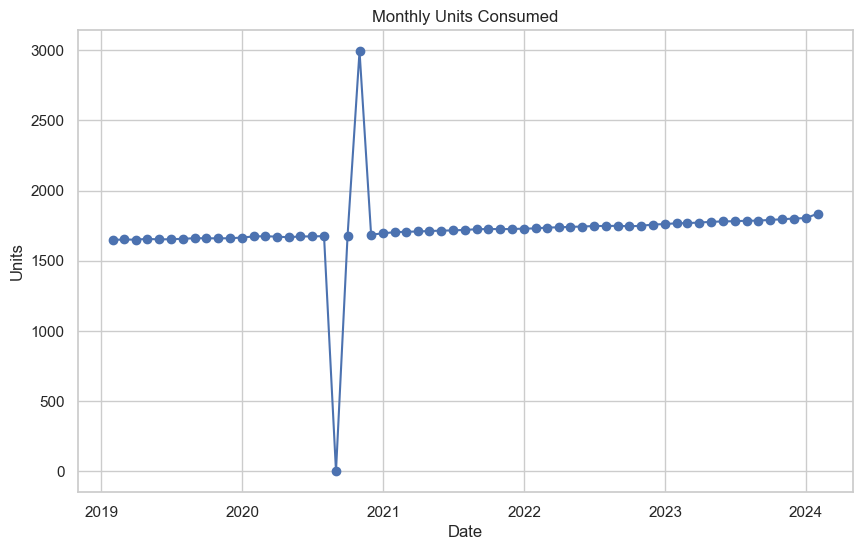

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'date' column is already in datetime format
# If not, convert it to datetime format
df['date'] = pd.to_datetime(df['date'])

# Aggregate data by month and sum the 'Units' column
monthly_units = df.resample('M', on='date').sum()

# Plot monthly units consumed
plt.figure(figsize=(10, 6))
plt.plot(monthly_units.index, monthly_units['Units'], marker='o', linestyle='-')
plt.title('Monthly Units Consumed')
plt.xlabel('Date')
plt.ylabel('Units')
plt.grid(True)
plt.show()

# If you want to plot daily units consumed, replace 'M' with 'D' in the resample function


In [30]:
df

,Circle,Division,SubDivision,Section,Area,CatCode,CatDesc,TotServices,BilledServices,Units,Load,date
0,15,36,MULUGU ROAD,MATWADA,2367,3.0,INDUSTRIAL,0.279202,0.242063,0.412006,0.145364,2019-01-01
1,7,38,YELLAREDDY,YELLAREDDY,3833,3.0,INDUSTRIAL,0.002849,0.007937,0.397081,0.000729,2019-01-01
2,7,38,YELLAREDDY,YELLAREDDY,1300,3.0,INDUSTRIAL,0.005698,0.007937,0.396511,0.001620,2019-01-01
3,0,35,UTNOOR,GUDIHATNOOR,1218,3.0,INDUSTRIAL,0.048433,0.051587,0.404814,0.026811,2019-01-01
4,7,38,YELLAREDDY,NAGIREDDIPET,2354,3.0,INDUSTRIAL,0.000000,0.003968,0.396613,0.000810,2019-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...
261792,15,27,NARSAMPET(TOWN,DUGGONDI,3339,3.0,INDUSTRIAL,0.000000,0.003968,0.396524,0.000405,2024-01-01
261793,15,27,NARSAMPET(TOWN,DUGGONDI,3860,3.0,INDUSTRIAL,0.000000,0.003968,0.396466,0.000405,2024-01-01
261794,15,27,NARSAMPET(TOWN,DUGGONDI,4068,3.0,INDUSTRIAL,0.017094,0.019841,0.397898,0.007695,2024-01-01
261795,15,31,KAPULAKANAPARTHY,MACHAPOOR,3562,3.0,INDUSTRIAL,0.000000,0.003968,0.397367,0.004010,2024-01-01


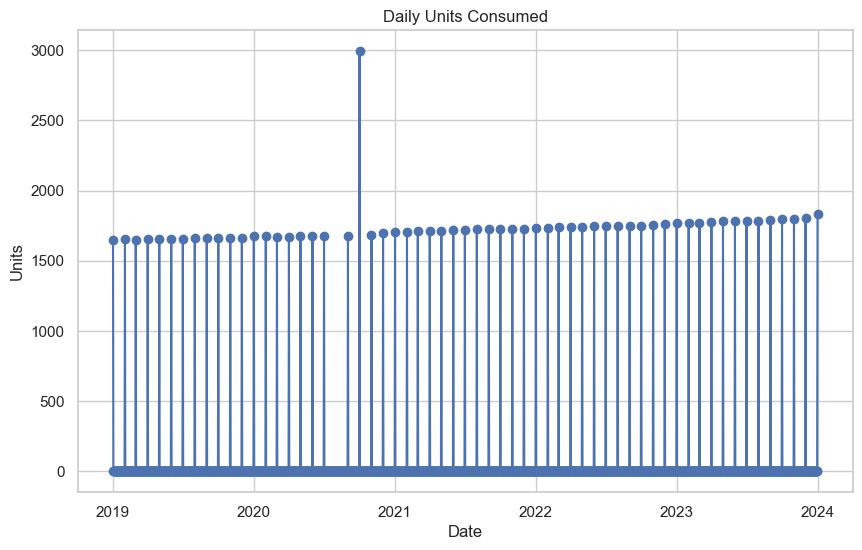

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'date' column is already in datetime format
# If not, convert it to datetime format
df['date'] = pd.to_datetime(df['date'])

# Aggregate data by month and sum the 'Units' column
monthly_units = df.resample('D', on='date').sum()

# Plot monthly units consumed
plt.figure(figsize=(10, 6))
plt.plot(monthly_units.index, monthly_units['Units'], marker='o', linestyle='-')
plt.title('Daily Units Consumed')
plt.xlabel('Date')
plt.ylabel('Units')
plt.grid(True)
plt.show()


In [32]:
df

,Circle,Division,SubDivision,Section,Area,CatCode,CatDesc,TotServices,BilledServices,Units,Load,date
0,15,36,MULUGU ROAD,MATWADA,2367,3.0,INDUSTRIAL,0.279202,0.242063,0.412006,0.145364,2019-01-01
1,7,38,YELLAREDDY,YELLAREDDY,3833,3.0,INDUSTRIAL,0.002849,0.007937,0.397081,0.000729,2019-01-01
2,7,38,YELLAREDDY,YELLAREDDY,1300,3.0,INDUSTRIAL,0.005698,0.007937,0.396511,0.001620,2019-01-01
3,0,35,UTNOOR,GUDIHATNOOR,1218,3.0,INDUSTRIAL,0.048433,0.051587,0.404814,0.026811,2019-01-01
4,7,38,YELLAREDDY,NAGIREDDIPET,2354,3.0,INDUSTRIAL,0.000000,0.003968,0.396613,0.000810,2019-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...
261792,15,27,NARSAMPET(TOWN,DUGGONDI,3339,3.0,INDUSTRIAL,0.000000,0.003968,0.396524,0.000405,2024-01-01
261793,15,27,NARSAMPET(TOWN,DUGGONDI,3860,3.0,INDUSTRIAL,0.000000,0.003968,0.396466,0.000405,2024-01-01
261794,15,27,NARSAMPET(TOWN,DUGGONDI,4068,3.0,INDUSTRIAL,0.017094,0.019841,0.397898,0.007695,2024-01-01
261795,15,31,KAPULAKANAPARTHY,MACHAPOOR,3562,3.0,INDUSTRIAL,0.000000,0.003968,0.397367,0.004010,2024-01-01


/Users/lovishmiglani/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/lovishmiglani/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


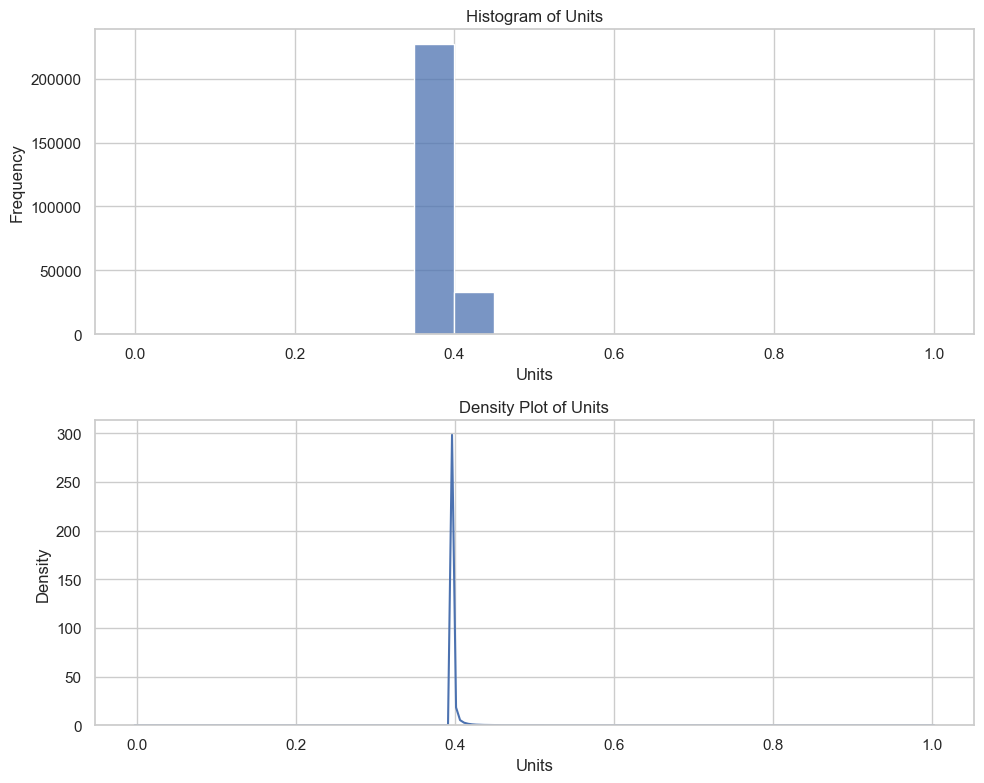

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a figure with subplots
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# Plot histogram of 'Units' with manually specified bins
sns.histplot(df['Units'], kde=False, bins=20, ax=axes[0])  # Adjust bins as needed
axes[0].set_title('Histogram of Units')
axes[0].set_xlabel('Units')
axes[0].set_ylabel('Frequency')

# Plot density plot of 'Units'
sns.kdeplot(df['Units'], ax=axes[1])
axes[1].set_title('Density Plot of Units')
axes[1].set_xlabel('Units')
axes[1].set_ylabel('Density')

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()


In [15]:
# df['date_copy'] = df['date']

In [34]:
df

,Circle,Division,SubDivision,Section,Area,CatCode,CatDesc,TotServices,BilledServices,Units,Load,date
0,15,36,MULUGU ROAD,MATWADA,2367,3.0,INDUSTRIAL,0.279202,0.242063,0.412006,0.145364,2019-01-01
1,7,38,YELLAREDDY,YELLAREDDY,3833,3.0,INDUSTRIAL,0.002849,0.007937,0.397081,0.000729,2019-01-01
2,7,38,YELLAREDDY,YELLAREDDY,1300,3.0,INDUSTRIAL,0.005698,0.007937,0.396511,0.001620,2019-01-01
3,0,35,UTNOOR,GUDIHATNOOR,1218,3.0,INDUSTRIAL,0.048433,0.051587,0.404814,0.026811,2019-01-01
4,7,38,YELLAREDDY,NAGIREDDIPET,2354,3.0,INDUSTRIAL,0.000000,0.003968,0.396613,0.000810,2019-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...
261792,15,27,NARSAMPET(TOWN,DUGGONDI,3339,3.0,INDUSTRIAL,0.000000,0.003968,0.396524,0.000405,2024-01-01
261793,15,27,NARSAMPET(TOWN,DUGGONDI,3860,3.0,INDUSTRIAL,0.000000,0.003968,0.396466,0.000405,2024-01-01
261794,15,27,NARSAMPET(TOWN,DUGGONDI,4068,3.0,INDUSTRIAL,0.017094,0.019841,0.397898,0.007695,2024-01-01
261795,15,31,KAPULAKANAPARTHY,MACHAPOOR,3562,3.0,INDUSTRIAL,0.000000,0.003968,0.397367,0.004010,2024-01-01


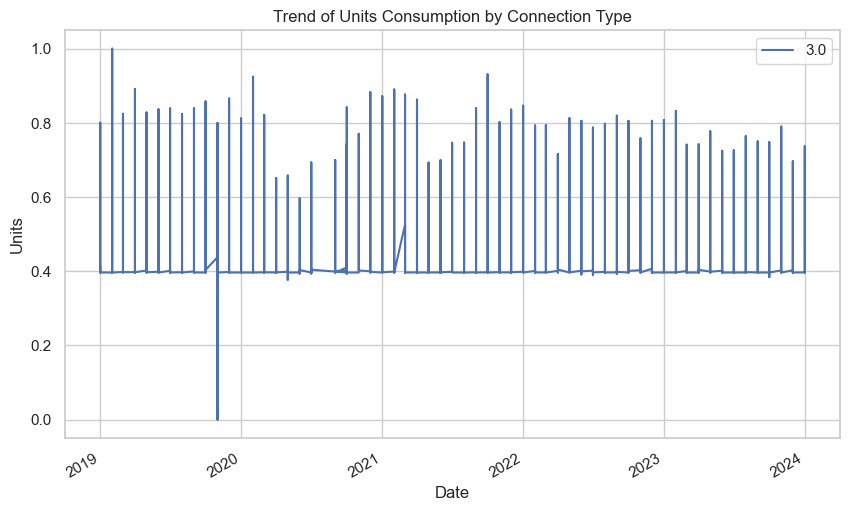

In [37]:
# Group data by 'ConnectionType' and calculate statistics
connection_stats = df.groupby('CatCode')['Units'].agg(['mean', 'max']).reset_index()
connection_stats.rename(columns={'mean': 'Mean_Units', 'max': 'Max_Units'}, inplace=True)

# Trend by 'ConnectionType'
plt.figure(figsize=(10, 6))  # Adjusted figure size
for connection, data in df.groupby('CatCode'):
    data = data.set_index('date')
    data['Units'].plot(label=connection)

plt.title('Trend of Units Consumption by Connection Type')
plt.xlabel('Date')
plt.ylabel('Units')
plt.legend()
plt.show()

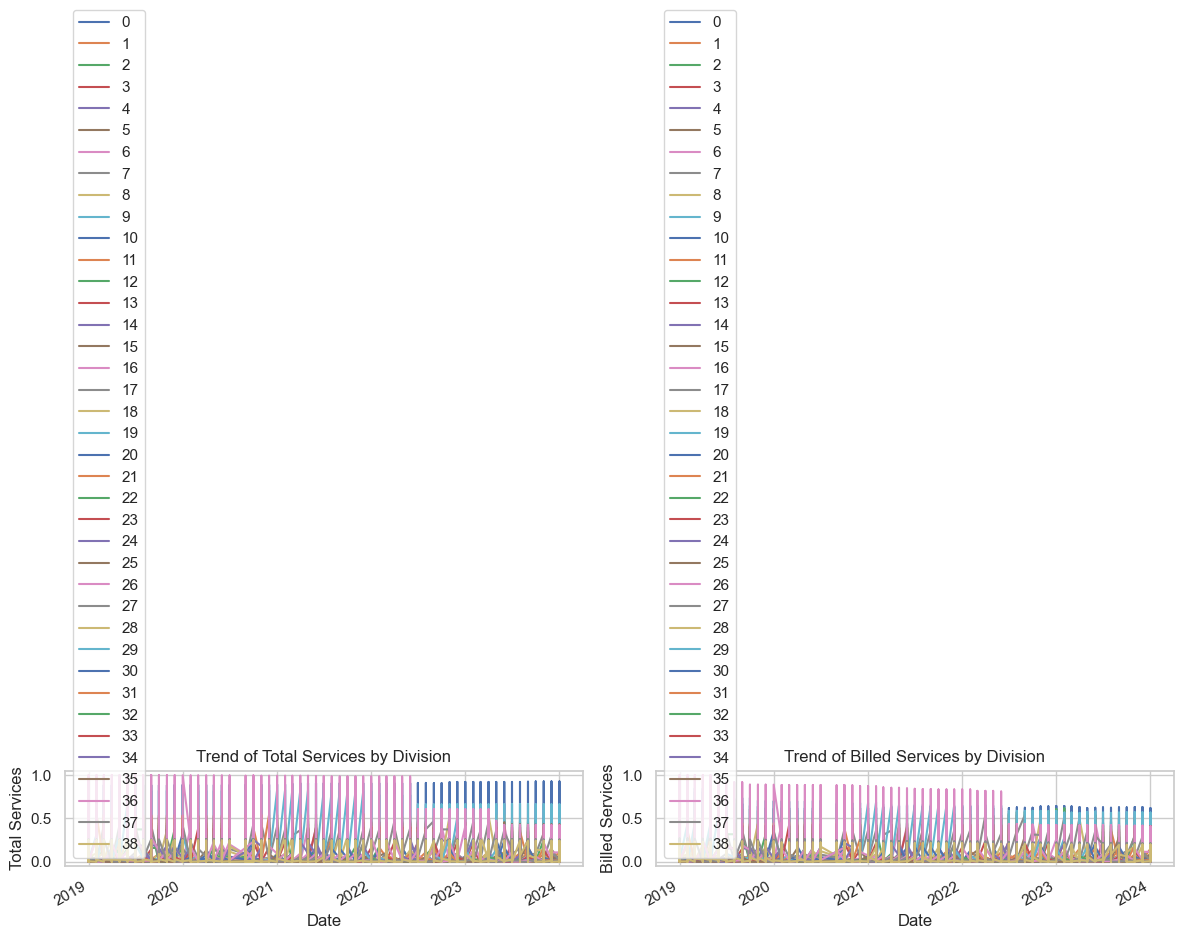

In [44]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(12, 6))

# Trend by 'Total Services'
plt.subplot(1, 2, 1)  # Subplot 1
for division, data in df.groupby('Division'):
    data.set_index('date')['TotServices'].plot(label=division)

plt.title('Trend of Total Services by Division')
plt.xlabel('Date')
plt.ylabel('Total Services')
plt.legend()
plt.grid(True)

# Trend by 'Billed Services'
plt.subplot(1, 2, 2)  # Subplot 2
for division, data in df.groupby('Division'):
    data.set_index('date')['BilledServices'].plot(label=division)

plt.title('Trend of Billed Services by Division')
plt.xlabel('Date')
plt.ylabel('Billed Services')
plt.legend()
plt.grid(True)

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()


In [46]:
df

,level_0,index,Circle,Division,SubDivision,Section,Area,CatCode,CatDesc,TotServices,BilledServices,Units,Load,date
0,0,0,15,36,MULUGU ROAD,MATWADA,2367,3.0,INDUSTRIAL,0.279202,0.242063,0.412006,0.145364,2019-01-01
1,1,1,7,38,YELLAREDDY,YELLAREDDY,3833,3.0,INDUSTRIAL,0.002849,0.007937,0.397081,0.000729,2019-01-01
2,2,2,7,38,YELLAREDDY,YELLAREDDY,1300,3.0,INDUSTRIAL,0.005698,0.007937,0.396511,0.001620,2019-01-01
3,3,3,0,35,UTNOOR,GUDIHATNOOR,1218,3.0,INDUSTRIAL,0.048433,0.051587,0.404814,0.026811,2019-01-01
4,4,4,7,38,YELLAREDDY,NAGIREDDIPET,2354,3.0,INDUSTRIAL,0.000000,0.003968,0.396613,0.000810,2019-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261792,261792,261792,15,27,NARSAMPET(TOWN,DUGGONDI,3339,3.0,INDUSTRIAL,0.000000,0.003968,0.396524,0.000405,2024-01-01
261793,261793,261793,15,27,NARSAMPET(TOWN,DUGGONDI,3860,3.0,INDUSTRIAL,0.000000,0.003968,0.396466,0.000405,2024-01-01
261794,261794,261794,15,27,NARSAMPET(TOWN,DUGGONDI,4068,3.0,INDUSTRIAL,0.017094,0.019841,0.397898,0.007695,2024-01-01
261795,261795,261795,15,31,KAPULAKANAPARTHY,MACHAPOOR,3562,3.0,INDUSTRIAL,0.000000,0.003968,0.397367,0.004010,2024-01-01


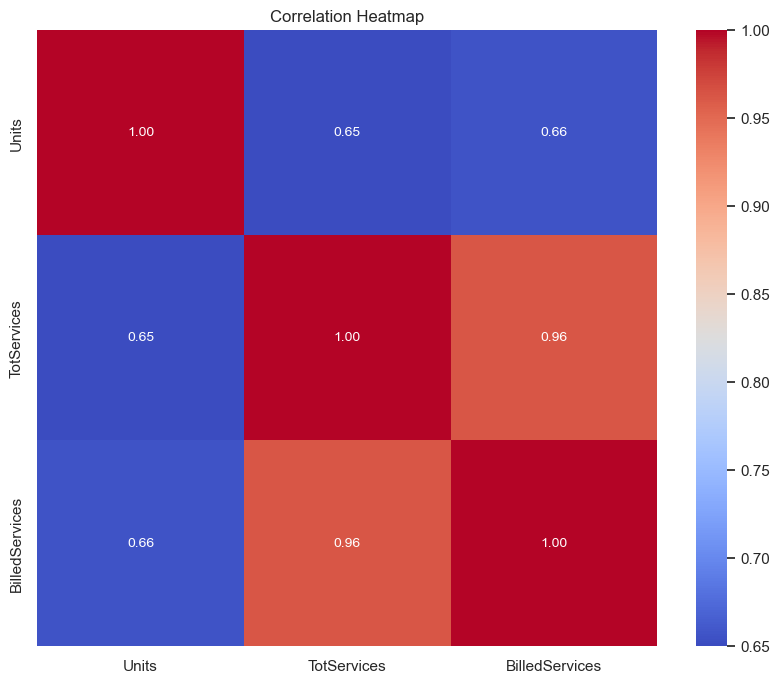

In [49]:
import seaborn as sns

# Select relevant columns for correlation analysis
selected_columns = ['Units', 'TotServices', 'BilledServices']

# Subset the DataFrame with the selected columns
selected_data = df[selected_columns]

# Calculate the correlation matrix
correlation_matrix = selected_data.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap')
plt.show()


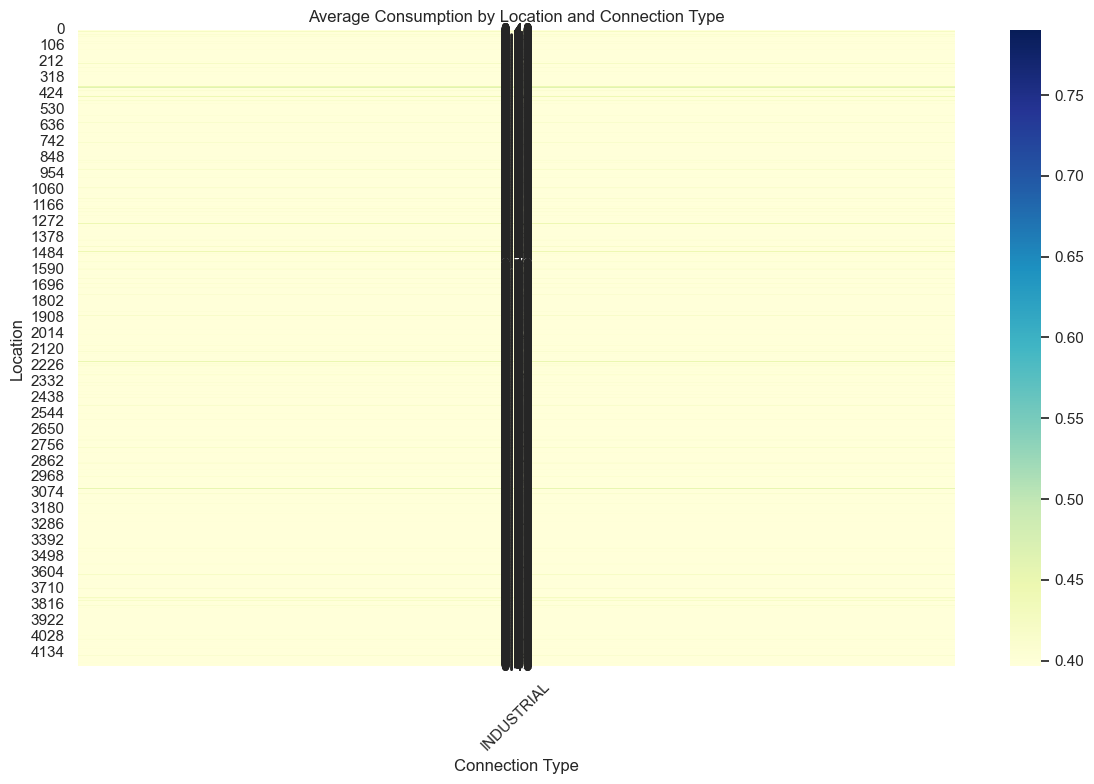

In [50]:
# Group the data by 'Area' and 'CatDesc', and calculate the mean consumption for each group
consumption_by_location_type = df.groupby(['Area', 'CatDesc'])['Units'].mean().reset_index()

# Pivot the data for better visualization
pivot_table = consumption_by_location_type.pivot(index='Area', columns='CatDesc', values='Units')

# Plot the comparison using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt=".2f")
plt.title('Average Consumption by Location and Connection Type')
plt.xlabel('Connection Type')
plt.ylabel('Location')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [51]:
duplicate_records = df.duplicated()
print("Duplicate Records:")
print(df[duplicate_records])

Duplicate Records:
Empty DataFrame
Columns: [level_0, index, Circle, Division, SubDivision, Section, Area, CatCode, CatDesc, TotServices, BilledServices, Units, Load, date]
Index: []


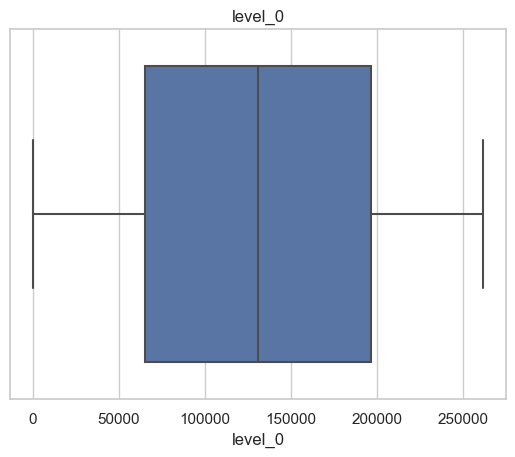

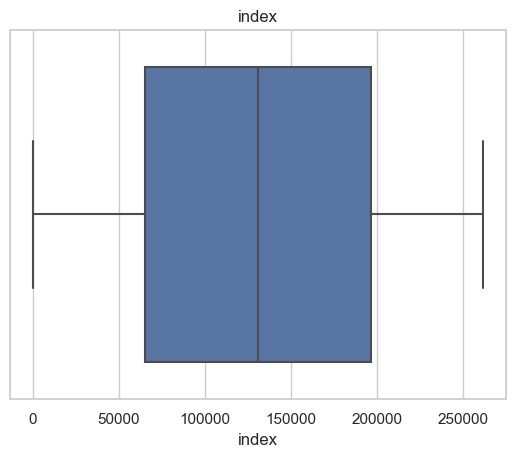

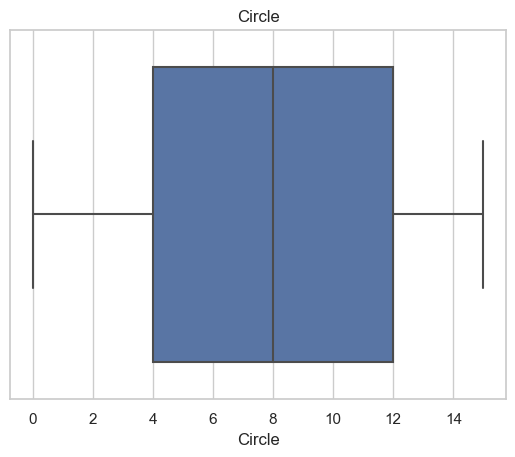

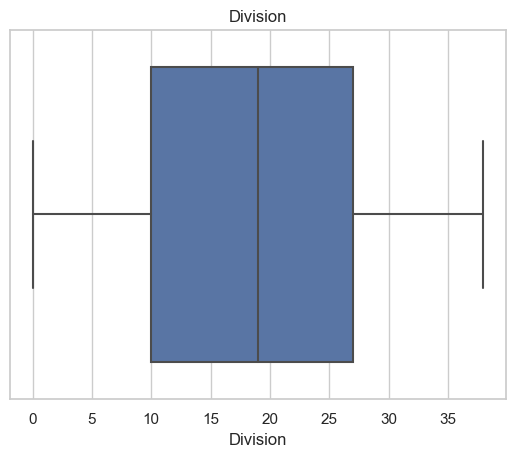

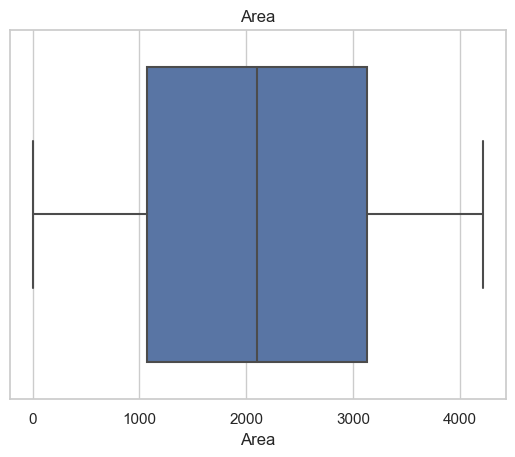

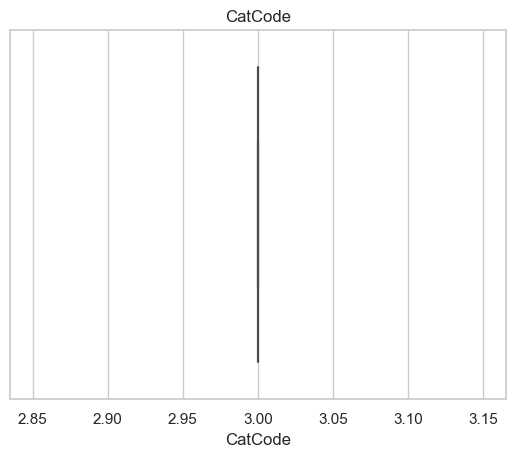

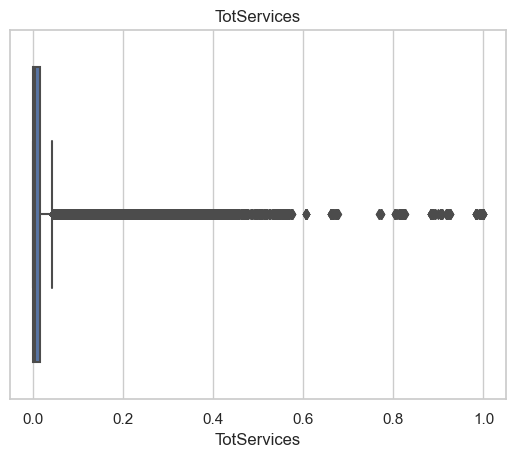

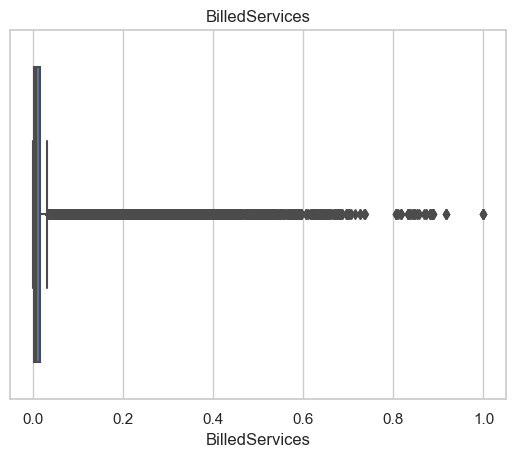

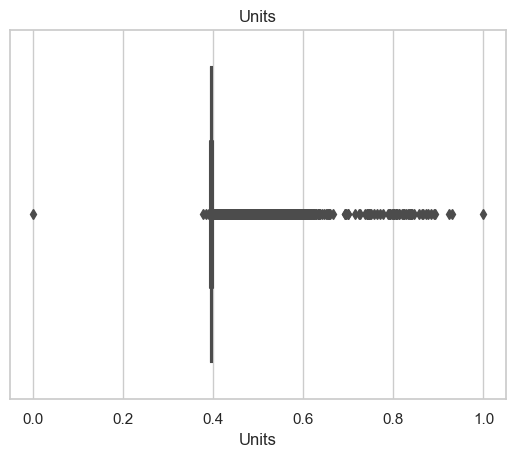

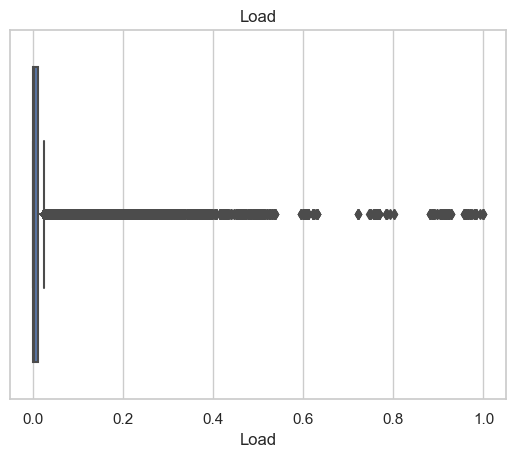

In [53]:
# Identify outliers
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.show()

In [60]:
# Assuming the DataFrame is sorted chronologically by date
# Create lag features
df['Units_prev_month'] = df['Units'].shift(1)
df['Units_2months_ago'] = df['Units'].shift(2)

# Print the DataFrame with lag features
df.head()

,level_0,index,Circle,Division,SubDivision,Section,Area,CatCode,CatDesc,TotServices,BilledServices,Units,Load,date,Units_prev_month,Units_2months_ago
0,0,0,15,36,MULUGU ROAD,MATWADA,2367,3.0,INDUSTRIAL,0.279202,0.242063,0.412006,0.145364,2019-01-01,NaN,NaN
1,1,1,7,38,YELLAREDDY,YELLAREDDY,3833,3.0,INDUSTRIAL,0.002849,0.007937,0.397081,0.000729,2019-01-01,0.412006,NaN
2,2,2,7,38,YELLAREDDY,YELLAREDDY,1300,3.0,INDUSTRIAL,0.005698,0.007937,0.396511,0.001620,2019-01-01,0.397081,0.412006
3,3,3,0,35,UTNOOR,GUDIHATNOOR,1218,3.0,INDUSTRIAL,0.048433,0.051587,0.404814,0.026811,2019-01-01,0.396511,0.397081
4,4,4,7,38,YELLAREDDY,NAGIREDDIPET,2354,3.0,INDUSTRIAL,0.000000,0.003968,0.396613,0.000810,2019-01-01,0.404814,0.396511
